In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
x,y = make_blobs(n_samples = 1000, centers = 3, n_features = 2 )

In [3]:
x.shape

(1000, 2)

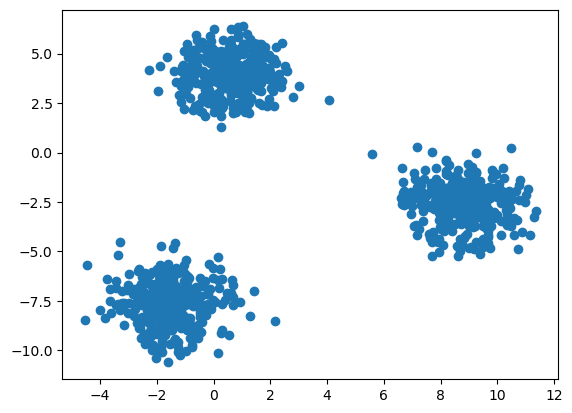

In [4]:
plt.scatter(x[:,0],x[:,1])

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.33,random_state = 42)

In [7]:
from sklearn.cluster import KMeans

In [8]:
## Manual process (Elbow method to select the k value)
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters = k,init = 'k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [9]:
wcss

[29772.532661748348,
 13527.524774727039,
 1375.164015806194,
 1193.0865137397116,
 1009.6252912904213,
 885.5525507029723,
 780.3294797460394,
 692.2384851931057,
 604.4313279086534,
 542.4261293363977]

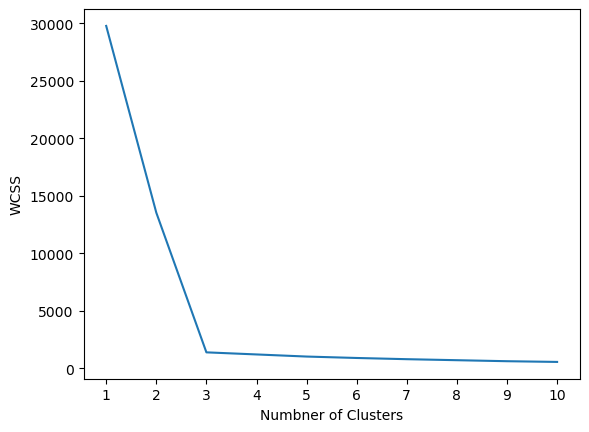

In [10]:
##Plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Numbner of Clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++')

In [14]:
y_labels = kmeans.fit_predict(x_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [15]:
y_test_labels = kmeans.predict(x_test)

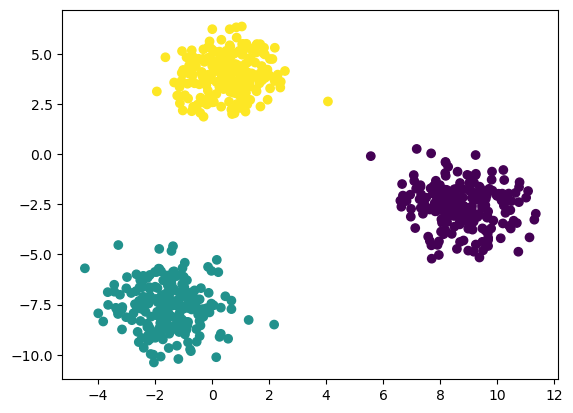

In [16]:
plt.scatter(x_train[:,0],x_train[:,1],c = y_labels)

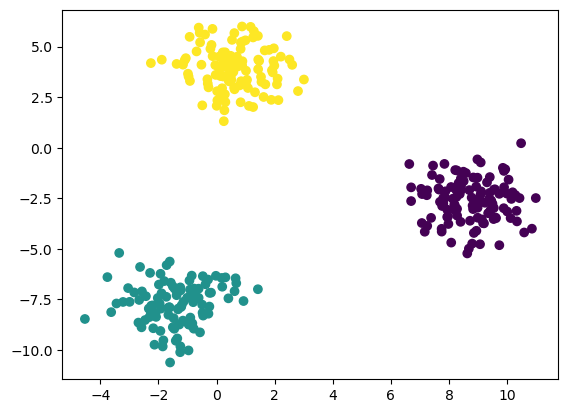

In [17]:
plt.scatter(x_test[:,0],x_test[:,1],c = y_test_labels)

In [18]:
## Knee Locator
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [19]:
from kneed import KneeLocator

In [20]:
kl = KneeLocator(range(1,11),wcss,curve = 'convex',direction = 'decreasing')
kl.elbow

3

In [22]:
## Preformance Metrics
## Silhoutte Score
from sklearn.metrics import silhouette_score

In [23]:
silhouette_coefficients = []
for k in range (2,11):
    kmeans = KMeans(n_clusters = k,init = 'k-means++')
    kmeans.fit(x_train)
    score = silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [24]:
silhouette_coefficients

[0.5962193084452813,
 0.8310621962005079,
 0.6661973882829123,
 0.4936481266340951,
 0.3245305236597761,
 0.3398098064279385,
 0.3289917587313816,
 0.3486239416701926,
 0.35154778084283395]

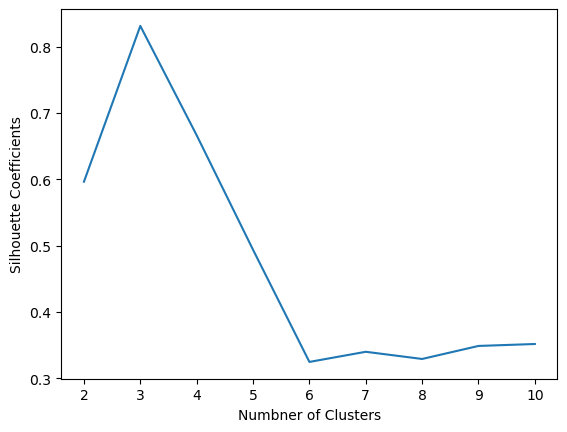

In [26]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Numbner of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()